###Week 4: Classification with Logistic Regression
Objective: Understand binary classification using logistic regression

####Experiment 4:

Build a logistic regression model to classify emails as spamor not spam.
*   Accuracy: A percentage indicating how many emails were correctly classified.
*   Assess model performance using accuracy, confusion matrix, and classification report (Classification Report: Precision, Recall, and F1-score for both spam and non-spam classes)

Note: We will use a publicly available dataset such as the SpamBase dataset from the UCI Machine Learning Repository or create a simple synthetic dataset for demonstration purposes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = '/content/gdrive/My Drive/spambase.data'
col_names = [f'feature_{i}' for i in range(1, 58)] + ['spam']
data = pd.read_csv(url, header=None, names=col_names)
print(data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_7  feature_8  feature_9  feature_10  ...  feature_49  feature_50  \
0       0.00       0.00       0.00        0.00  ...        0.00       0.000   
1       0.21       0.07       0.00        0.94  ...        0.00       0.132   
2       0.19       0.12       0.64        0.25  ...        0.01       0.143   
3       0.31       0.63       0.31        0.63  ...        0.00       0.137   
4       0.31       0.63       0.31        0.63  ...        0.00       0.135   

   feature_51  feature_52  feature_53  feature_54  feature_55  feature_56  \
0         0.0       0

In [ ]:
X = data.drop('spam', axis=1)
y = data['spam']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
# Train the model on the training set
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
class_report = classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"])
print('Classification Report:')
print(class_report)

Accuracy: 91.97%
Confusion Matrix:
[[506  25]
 [ 49 341]]
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.91      0.95      0.93       531
        Spam       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



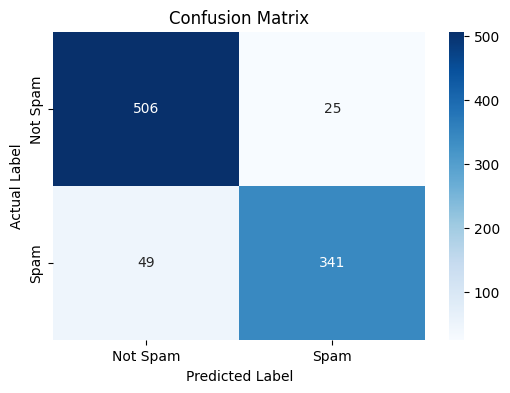

In [ ]:
# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()